<a href="https://colab.research.google.com/github/danielramo27s/UDEA-ai4eng-20242/blob/main/02%20-%20preprocesado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cargamos el archivo kaggle.json para tener acceso a la competencia de kaggle

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"danielramos27","key":"68ee7434e74c3a6f858f223a903a33a4"}'}

Configuramos los permisos y descargamos los archivos

In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"

!chmod 600 /content/kaggle.json

descargamos los archivos directamente desde kaggle

In [3]:
!kaggle competitions download -c udea-ai4eng-20242

100% 20.1M/20.1M [00:00<00:00, 102MB/s] 
100% 20.1M/20.1M [00:00<00:00, 99.8MB/s]


descomprimimos el archivo zip

In [4]:
import zipfile

# Descomprime el archivo
with zipfile.ZipFile("/content/udea-ai4eng-20242.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/udea-ai4eng-20242")

listamos los archivos descomprimidos

In [5]:
print(os.listdir('/content/udea-ai4eng-20242'))

['submission_example.csv', 'test.csv', 'train.csv']


con panda cargamos el archivo train.csv y con df.head visualizamos las primeras filas para poder ver las categorias

In [6]:
import pandas as pd

df = pd.read_csv('/content/udea-ai4eng-20242/train.csv')

# Muestra las primeras filas del DataFrame
from IPython.display import display

display(df.head(),df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 12 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   ID                              692500 non-null  int64 
 1   PERIODO                         692500 non-null  int64 
 2   ESTU_PRGM_ACADEMICO             692500 non-null  object
 3   ESTU_PRGM_DEPARTAMENTO          692500 non-null  object
 4   ESTU_VALORMATRICULAUNIVERSIDAD  686213 non-null  object
 5   ESTU_HORASSEMANATRABAJA         661643 non-null  object
 6   FAMI_ESTRATOVIVIENDA            660363 non-null  object
 7   FAMI_TIENEINTERNET              665871 non-null  object
 8   FAMI_EDUCACIONPADRE             669322 non-null  object
 9   FAMI_EDUCACIONMADRE             668836 non-null  object
 10  ESTU_PAGOMATRICULAPROPIO        686002 non-null  object
 11  RENDIMIENTO_GLOBAL              692500 non-null  object
dtypes: int64(2), object(10)
memory

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo


None

Verificamos la cantidad de valores nulos en cada columna

In [7]:
df.isnull().sum()

,0
ID,0
PERIODO,0
ESTU_PRGM_ACADEMICO,0
ESTU_PRGM_DEPARTAMENTO,0
ESTU_VALORMATRICULAUNIVERSIDAD,6287
ESTU_HORASSEMANATRABAJA,30857
FAMI_ESTRATOVIVIENDA,32137
FAMI_TIENEINTERNET,26629
FAMI_EDUCACIONPADRE,23178
FAMI_EDUCACIONMADRE,23664


calcularemos el porcentaje de valores faltantes por columna



In [8]:
# Calcular el porcentaje de valores faltantes por columna
valores_faltantes= df.isna().sum() / len(df) * 100

# Filtrar columnas con valores faltantes y ordenarlas
valores_faltantes[valores_faltantes > 0].sort_values(ascending=False)


,0
FAMI_ESTRATOVIVIENDA,4.640722
ESTU_HORASSEMANATRABAJA,4.455884
FAMI_TIENEINTERNET,3.845343
FAMI_EDUCACIONMADRE,3.417184
FAMI_EDUCACIONPADRE,3.347004
ESTU_PAGOMATRICULAPROPIO,0.938339
ESTU_VALORMATRICULAUNIVERSIDAD,0.907870


seguimos visualizando los datos faltantes pero ahora con Gráfico de Barras de Valores Faltantes

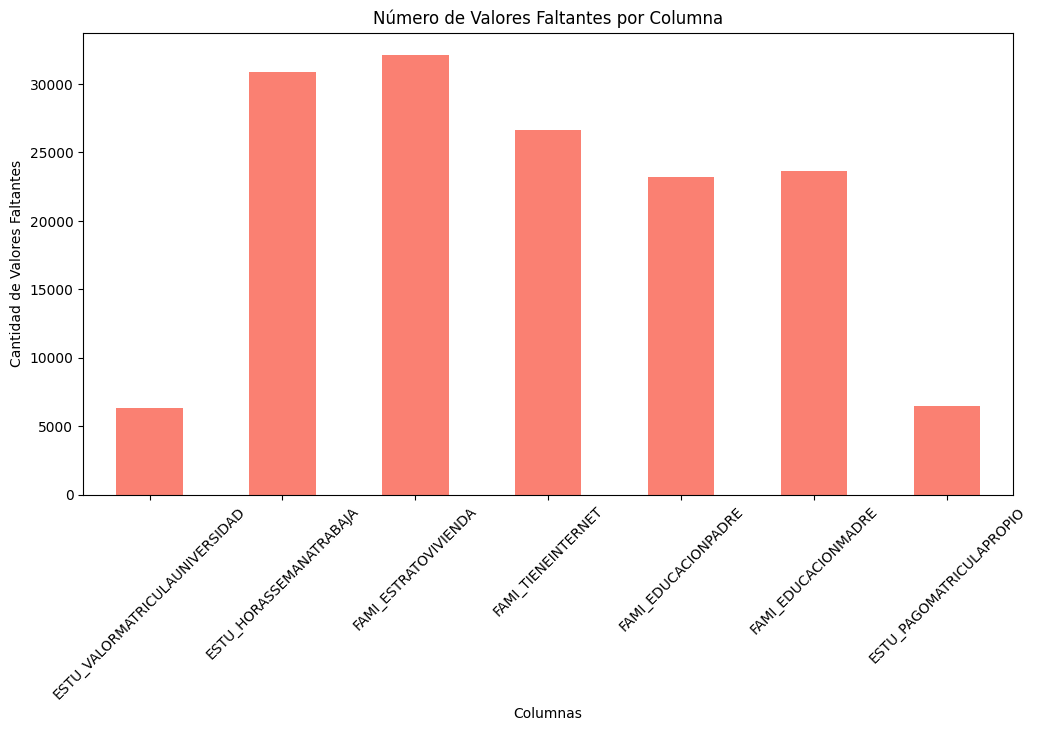

In [10]:
import matplotlib.pyplot as plt
# Contamos valores nulos por columna
missing_counts = df.isnull().sum()

# Creamos un gráfico de barras
plt.figure(figsize=(12, 6))
missing_counts[missing_counts > 0].plot(kind='bar', color='salmon')
plt.title('Número de Valores Faltantes por Columna')
plt.xlabel('Columnas')
plt.ylabel('Cantidad de Valores Faltantes')
plt.xticks(rotation=45)
plt.show()


In [11]:
!pip install matplotlib seaborn


usamos el siguiente codigo para analizar la distribucion de categorias de valores faltantes, con respecto al rendimiento global, y poder tomar una decision acerca de como imputar los datos faltantes



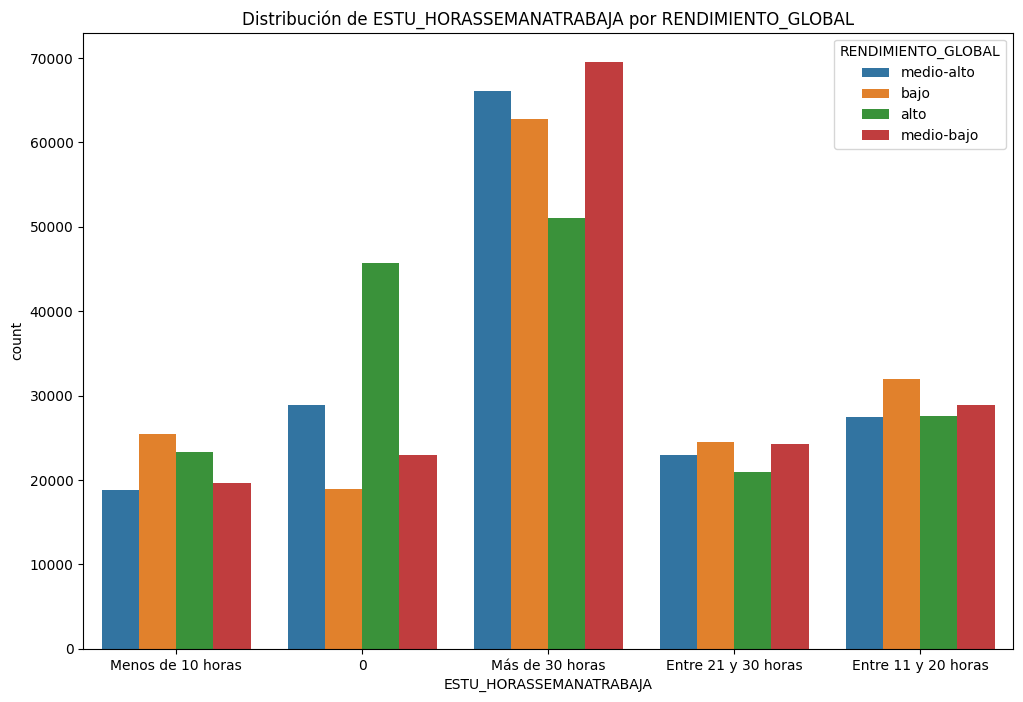

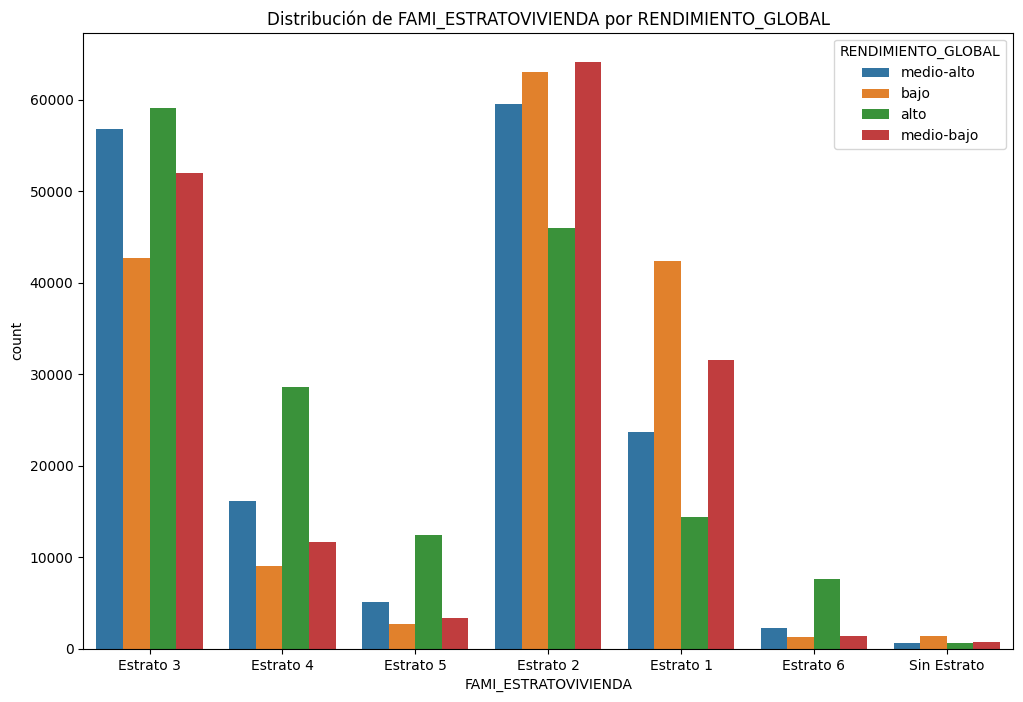

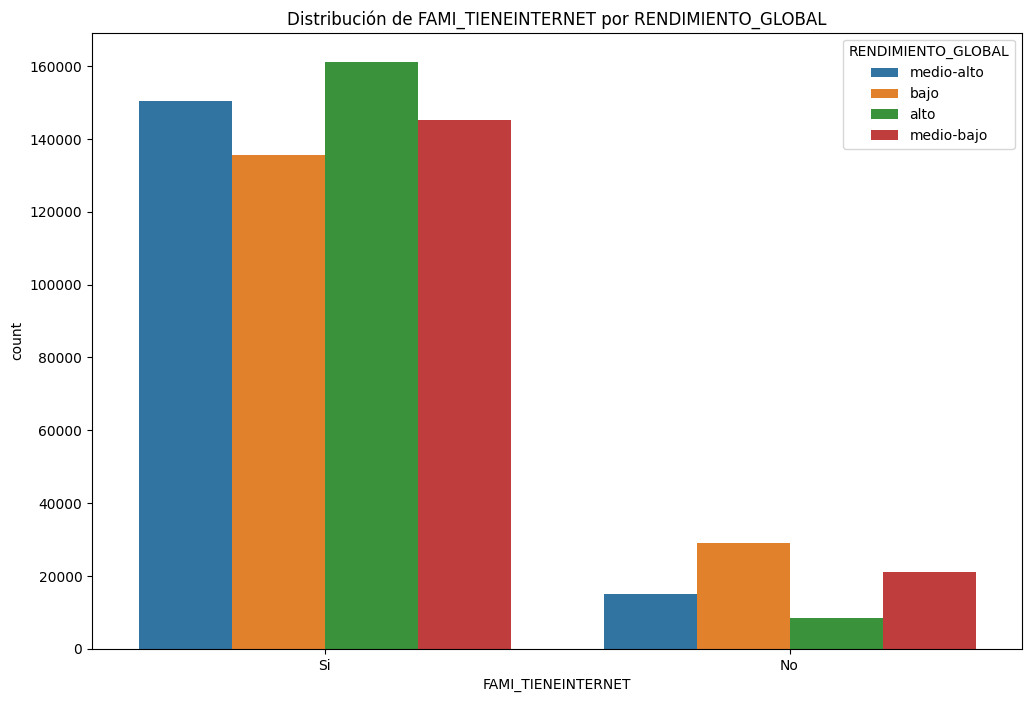

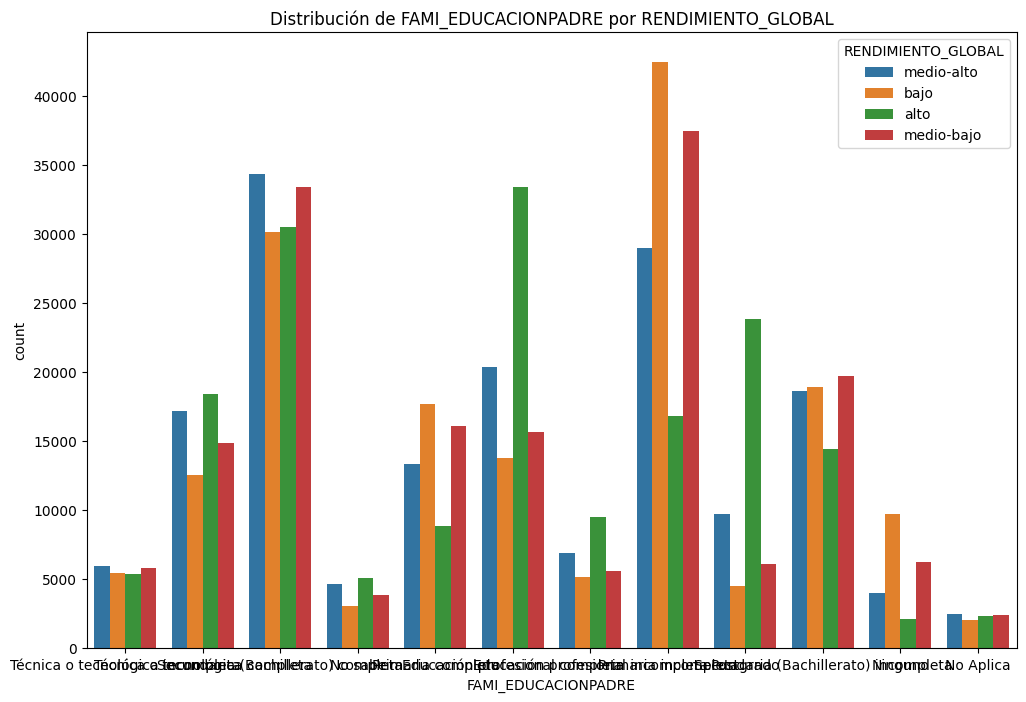

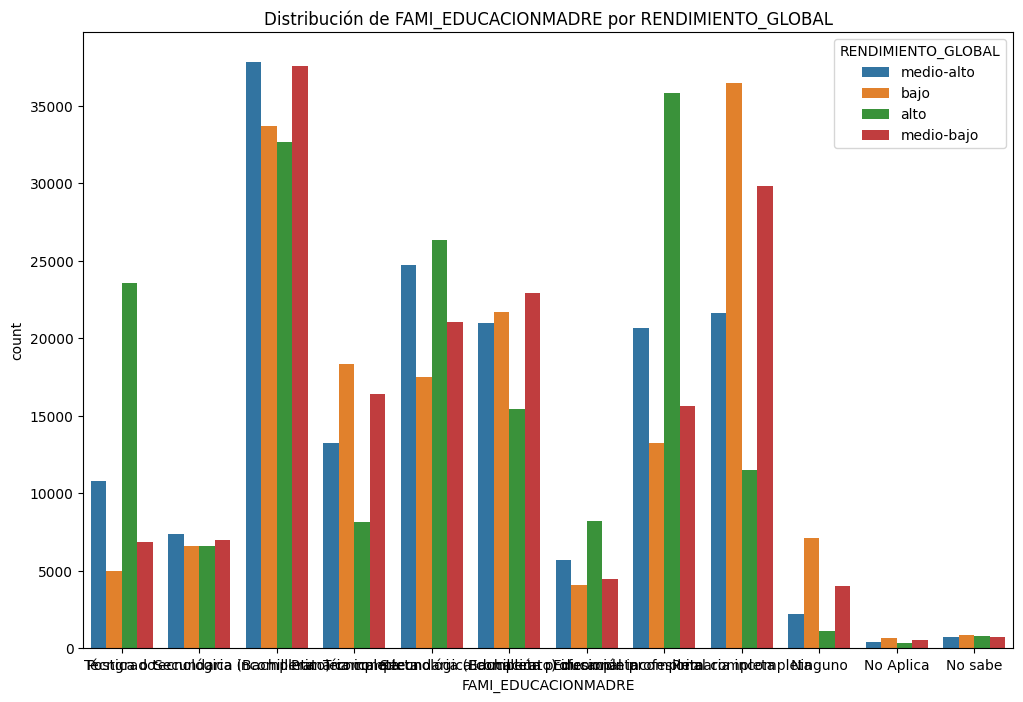

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt


for columna in ['ESTU_HORASSEMANATRABAJA', 'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE']:
    plt.figure(figsize=(12, 8))
    sns.countplot(data=df, x=columna, hue='RENDIMIENTO_GLOBAL')
    plt.title(f'Distribución de {columna} por RENDIMIENTO_GLOBAL')
    plt.legend(title='RENDIMIENTO_GLOBAL')
    plt.show()



In [23]:
import numpy as np
import pandas as pd

# Calculando las probabilidades de cada categoría
probabilidades = df['ESTU_HORASSEMANATRABAJA'].value_counts(normalize=True)

# Categorías (estratos)
categorias = probabilidades.index

# Función para imputar valores basada en la distribución de probabilidades
def imputar_probabilisticamenteestratos(valor,probabilidades,categorias):
    if pd.isnull(valor):
        return np.random.choice(categorias, p=probabilidades)
    else:
        return valor

# Aplicando la imputación al dataframe
df['ESTU_HORASSEMANATRABAJA'] = df['ESTU_HORASSEMANATRABAJA'].apply(lambda x: imputar_probabilisticamenteestratos(x, probabilidades, categorias))


In [24]:
import numpy as np
import pandas as pd

# Calculando las probabilidades de cada categoría
probabilidades_estrato = df['FAMI_ESTRATOVIVIENDA'].value_counts(normalize=True)

# Categorías (estratos)
categorias_estrato = probabilidades_estrato.index

# Función para imputar valores basada en la distribución de probabilidades
def imputar_probabilisticamenteestratos(valor,probabilidades_estrato,categorias_estrato):
    if pd.isnull(valor):
        return np.random.choice(categorias_estrato, p=probabilidades_estrato)
    else:
        return valor

# Aplicando la imputación al dataframe
df['FAMI_ESTRATOVIVIENDA'] = df['FAMI_ESTRATOVIVIENDA'].apply(lambda x: imputar_probabilisticamenteestratos(x, probabilidades_estrato, categorias_estrato))

In [27]:
import numpy as np
import pandas as pd

# Calculando las probabilidades de cada categoría para 'fami_tieneinternet'
probabilidades_internet = df['FAMI_TIENEINTERNET'].value_counts(normalize=True)

# Categorías (valores únicos en 'fami_tieneinternet')
categorias_internet = probabilidades_internet.index

# Función para imputar valores basada en la distribución de probabilidades
def imputar_probabilisticamenteinternet(valor, probabilidades_internet, categorias_internet):
    if pd.isnull(valor):
        return np.random.choice(categorias_internet, p=probabilidades_internet)
    else:
        return valor

# Aplicando la imputación al dataframe para 'fami_tieneinternet'
df['FAMI_TIENEINTERNET'] = df['FAMI_TIENEINTERNET'].apply(lambda x: imputar_probabilisticamenteinternet(x, probabilidades_internet, categorias_internet))


In [28]:
import numpy as np
import pandas as pd

# Calculando las probabilidades de cada categoría
probabilidades_estudiopadre = df['FAMI_EDUCACIONPADRE'].value_counts(normalize=True)

# Categorías (estratos)
categorias_estudiopadre = probabilidades_estudiopadre.index

# Función para imputar valores basada en la distribución de probabilidades
def imputar_probabilisticamenteestudiopadre(valor,probabilidades_estudiopadre,categorias_estudiopadre):
    if pd.isnull(valor):
        return np.random.choice(categorias_estudiopadre, p=probabilidades_estudiopadre)
    else:
        return valor

# Aplicando la imputación al dataframe
df['FAMI_EDUCACIONPADRE'] = df['FAMI_EDUCACIONPADRE'].apply(lambda x: imputar_probabilisticamenteestudiopadre(x, probabilidades_estudiopadre, categorias_estudiopadre))

In [29]:
import numpy as np
import pandas as pd

# Calculando las probabilidades de cada categoría
probabilidades_estudiomadre = df['FAMI_EDUCACIONMADRE'].value_counts(normalize=True)

# Categorías (estratos)
categorias_estudiomadre = probabilidades_estudiomadre.index

# Función para imputar valores basada en la distribución de probabilidades
def imputar_probabilisticamenteestudiomadre(valor,probabilidades_estudiomadre,categorias_estudiomadre):
    if pd.isnull(valor):
        return np.random.choice(categorias_estudiomadre, p=probabilidades_estudiomadre)
    else:
        return valor

# Aplicando la imputación al dataframe
df['FAMI_EDUCACIONMADRE'] = df['FAMI_EDUCACIONMADRE'].apply(lambda x: imputar_probabilisticamenteestudiomadre(x, probabilidades_estudiomadre, categorias_estudiomadre))

In [31]:
import numpy as np
import pandas as pd

# Calculando las probabilidades de cada categoría
probabilidades_estupagomatricula = df['ESTU_PAGOMATRICULAPROPIO'].value_counts(normalize=True)

# Categorías (estratos)
categorias_estupagomatricula = probabilidades_estupagomatricula.index

# Función para imputar valores basada en la distribución de probabilidades
def imputar_probabilisticamenteestupagomatricula(valor,probabilidades_estupagomatricula,categorias_estupagomatricula):
    if pd.isnull(valor):
        return np.random.choice(categorias_estupagomatricula, p=probabilidades_estupagomatricula)
    else:
        return valor

# Aplicando la imputación al dataframe
df['ESTU_PAGOMATRICULAPROPIO'] = df['ESTU_PAGOMATRICULAPROPIO'].apply(lambda x: imputar_probabilisticamenteestupagomatricula(x, probabilidades_estupagomatricula, categorias_estupagomatricula))

In [32]:
df.isnull().sum()
# Muestra las primeras filas del DataFrame
from IPython.display import display

display(df.head(),df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 12 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   ID                              692500 non-null  int64 
 1   PERIODO                         692500 non-null  int64 
 2   ESTU_PRGM_ACADEMICO             692500 non-null  object
 3   ESTU_PRGM_DEPARTAMENTO          692500 non-null  object
 4   ESTU_VALORMATRICULAUNIVERSIDAD  686213 non-null  object
 5   ESTU_HORASSEMANATRABAJA         692500 non-null  object
 6   FAMI_ESTRATOVIVIENDA            692500 non-null  object
 7   FAMI_TIENEINTERNET              692500 non-null  object
 8   FAMI_EDUCACIONPADRE             692500 non-null  object
 9   FAMI_EDUCACIONMADRE             692500 non-null  object
 10  ESTU_PAGOMATRICULAPROPIO        692500 non-null  object
 11  RENDIMIENTO_GLOBAL              692500 non-null  object
dtypes: int64(2), object(10)
memory

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo


None

Codificamos las variables categóricas con One-Hot Encoding

In [33]:
# Codificación one-hot para variables categóricas
df = pd.get_dummies(df, columns=['ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO', 'FAMI_ESTRATOVIVIENDA', 'ESTU_HORASSEMANATRABAJA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE', 'ESTU_PAGOMATRICULAPROPIO', 'ESTU_VALORMATRICULAUNIVERSIDAD'], drop_first=True, dtype=int)



Codificación ordinal para RENDIMIENTO_GLOBAL

In [34]:
# Codificación ordinal para 'RENDIMIENTO_GLOBAL'
rendimiento_mapping = {'bajo': 0, 'medio-bajo': 1, 'medio-alto': 2, 'alto': 3}
df['RENDIMIENTO_GLOBAL'] = df['RENDIMIENTO_GLOBAL'].map(rendimiento_mapping)


Verificar los datos después del preprocesamiento

In [35]:
# Verificar las primeras filas después del preprocesamiento
df.head()

# Verificar si quedan valores nulos
df.isnull().sum()


,0
ID,0
PERIODO,0
RENDIMIENTO_GLOBAL,0
ESTU_PRGM_ACADEMICO_ACTIVIDAD FISICA Y DEPORTE,0
ESTU_PRGM_ACADEMICO_ACUICULTURA,0
...,...
ESTU_VALORMATRICULAUNIVERSIDAD_Entre 5.5 millones y menos de 7 millones,0
ESTU_VALORMATRICULAUNIVERSIDAD_Entre 500 mil y menos de 1 millón,0
ESTU_VALORMATRICULAUNIVERSIDAD_Menos de 500 mil,0
ESTU_VALORMATRICULAUNIVERSIDAD_Más de 7 millones,0


In [36]:
# Muestra las primeras filas del DataFrame
from IPython.display import display

display(df.head())

,ID,PERIODO,RENDIMIENTO_GLOBAL,ESTU_PRGM_ACADEMICO_ACTIVIDAD FISICA Y DEPORTE,ESTU_PRGM_ACADEMICO_ACUICULTURA,ESTU_PRGM_ACADEMICO_ADMINISTRACION,ESTU_PRGM_ACADEMICO_ADMINISTRACION FINANCIERA,ESTU_PRGM_ACADEMICO_ADMINISTRACION & SERVICIO,ESTU_PRGM_ACADEMICO_ADMINISTRACION AERONAUTICA,ESTU_PRGM_ACADEMICO_ADMINISTRACION AGROPECUARIA,...,FAMI_EDUCACIONMADRE_Técnica o tecnológica completa,FAMI_EDUCACIONMADRE_Técnica o tecnológica incompleta,ESTU_PAGOMATRICULAPROPIO_Si,ESTU_VALORMATRICULAUNIVERSIDAD_Entre 2.5 millones y menos de 4 millones,ESTU_VALORMATRICULAUNIVERSIDAD_Entre 4 millones y menos de 5.5 millones,ESTU_VALORMATRICULAUNIVERSIDAD_Entre 5.5 millones y menos de 7 millones,ESTU_VALORMATRICULAUNIVERSIDAD_Entre 500 mil y menos de 1 millón,ESTU_VALORMATRICULAUNIVERSIDAD_Menos de 500 mil,ESTU_VALORMATRICULAUNIVERSIDAD_Más de 7 millones,ESTU_VALORMATRICULAUNIVERSIDAD_No pagó matrícula
0,904256,20212,2,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,645256,20212,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
2,308367,20203,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,470353,20195,3,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,989032,20212,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


convertimos el archivo preprocesado en csv, para poder descargarlo y guardarlo en el computador

In [37]:
import pandas as pd

# Supongamos que 'df' es tu DataFrame preprocesado
df.to_csv('dataset_preprocesado.csv', index=False)

In [38]:
from google.colab import files
files.download('dataset_preprocesado.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>